In [185]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [186]:
filename = "sinus.png"
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

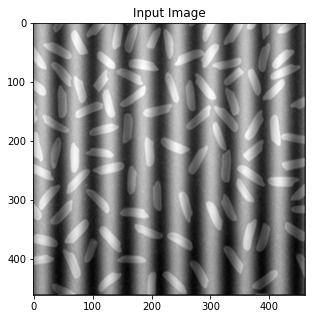

In [187]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.show()

In [188]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

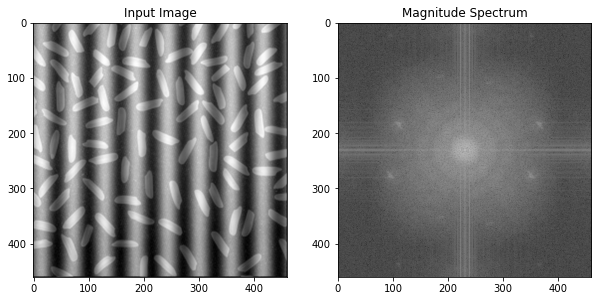

In [189]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

In [190]:
H1 = notch_reject_filter(image.shape, 3, 0, 8)
NotchFilter = H1

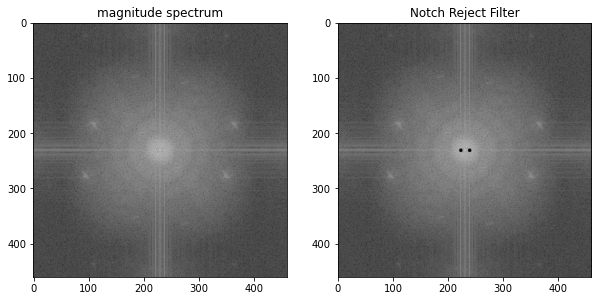

In [191]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')
plt.subplot(122)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
plt.title("Notch Reject Filter")
plt.show()

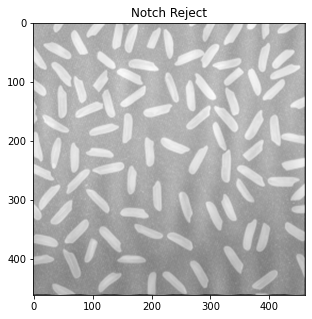

In [192]:
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)

image_notch_reject = np.abs(inverse_NotchReject)

plt.figure(figsize=(5,5))
plt.imshow(image_notch_reject, "gray") 
plt.title("Notch Reject")
plt.show()

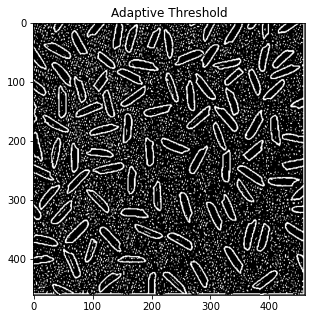

In [193]:
image_notch_reject = image_notch_reject.astype('uint8')
image_thresh = cv2.adaptiveThreshold (image_notch_reject, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, -2)

plt.figure(figsize=(5,5))
plt.imshow(image_thresh, "gray") 
plt.title("Adaptive Threshold")
plt.show()

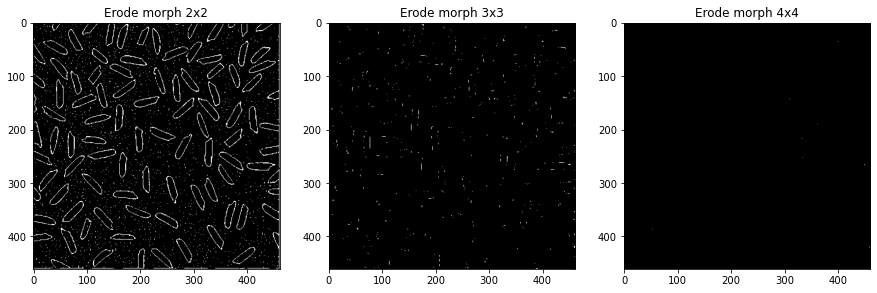

In [194]:
# Cần lọc nhiễu ở background
# Cách 1, morph erode. Do kích thước pixel nhiễu gần bằng kích thước pixel cạnh
# => Không khả thi

kernel = np.ones((2,2),np.uint8)
image_erode = cv2.erode(image_thresh, kernel)

kernel2 = np.ones((3,3),np.uint8)
image_erode2 = cv2.erode(image_thresh, kernel2)

kernel3 = np.ones((4,4),np.uint8)
image_erode3 = cv2.erode(image_thresh, kernel3)

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(image_erode, "gray") 
plt.title("Erode morph 2x2")
plt.subplot(132)
plt.imshow(image_erode2, "gray") 
plt.title("Erode morph 3x3")
plt.subplot(133)
plt.imshow(image_erode3, "gray") 
plt.title("Erode morph 4x4")
plt.show()

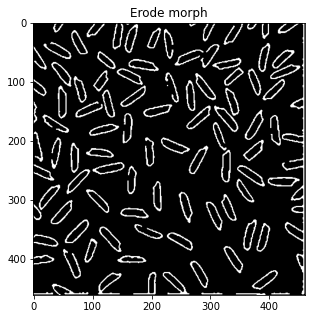

In [195]:
# Cách 2: Dùng bộ lọc median, lặp nhiều lần với cửa sổ nhỏ
# Kết quả khả thi

image_blur = cv2.medianBlur(image_thresh,3)
for i in range(4):
    image_blur = cv2.medianBlur(image_hpf_blur,3)

plt.figure(figsize=(5,5))
plt.imshow(image_blur, "gray") 
plt.title("Erode morph")
plt.show()

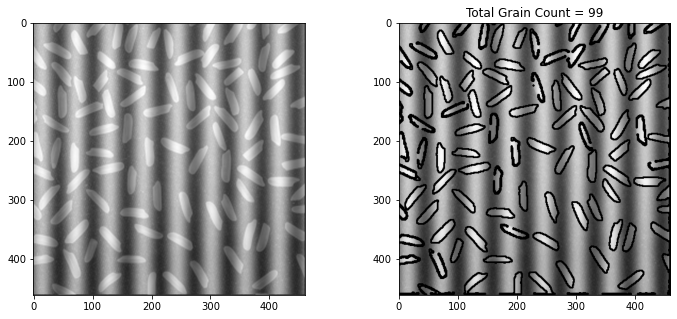

In [180]:
image_final = image_blur

cnts = cv2.findContours(image_final.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread(filename)
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))

for (i, c) in enumerate(cnts):
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))